# Introduction

Notebook to analyze the **True Positive** Results for each model in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
models_runner_4 = TC_BR_Runner()

lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df()

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[1,3,5,10], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,30.77,1.93,3.57,precision recall fscore ...,0.0,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
1,lsi,top_1_cosine_0.1,30.77,1.93,3.57,precision recall fscore ...,0.1,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
2,lsi,top_1_cosine_0.2,30.77,1.93,3.57,precision recall fscore ...,0.2,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
3,lsi,top_1_cosine_0.3,30.77,1.93,3.57,precision recall fscore ...,0.3,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...
4,lsi,top_1_cosine_0.4,28.57,1.86,3.44,precision recall fscore ...,0.4,1.0,br_name BR_1248267_SRC BR_1248268_SRC BR...


### Grouping Results by Model

#### Min Precision

model
bm25          21.21
lda            3.30
lsi            0.00
wordvector     4.98
Name: perc_precision, dtype: float64



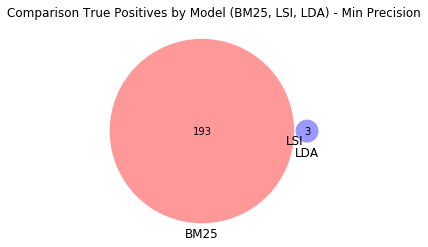

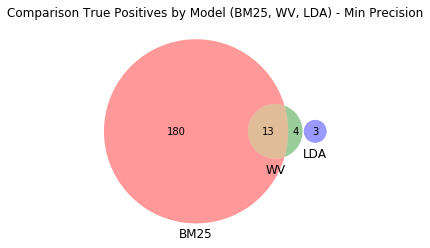

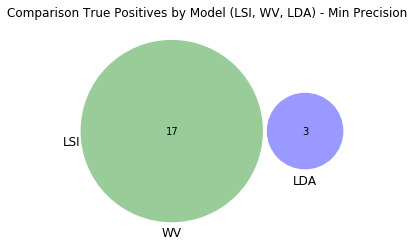

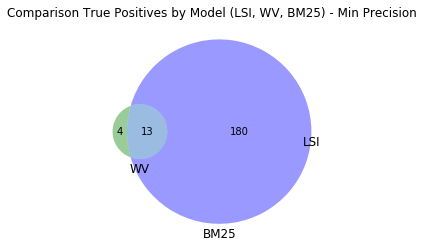

In [4]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [5]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(lsi_exc_set))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
display(lda_exc_set)
print("len(lda_exc_set): {}".format(lda_exc_set))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
display(wv_exc_set)
print("len(wv_exc_set): {}".format(wv_exc_set))

BM25 Exclusive TP:


{('TC_100_TRG', 'BR_1299458_SRC'),
 ('TC_104_TRG', 'BR_1300738_SRC'),
 ('TC_106_TRG', 'BR_1300738_SRC'),
 ('TC_107_TRG', 'BR_1300738_SRC'),
 ('TC_108_TRG', 'BR_1300738_SRC'),
 ('TC_109_TRG', 'BR_1300738_SRC'),
 ('TC_130_TRG', 'BR_1314643_SRC'),
 ('TC_13_TRG', 'BR_1294733_SRC'),
 ('TC_13_TRG', 'BR_1294887_SRC'),
 ('TC_13_TRG', 'BR_1296366_SRC'),
 ('TC_13_TRG', 'BR_1297374_SRC'),
 ('TC_13_TRG', 'BR_1335992_SRC'),
 ('TC_13_TRG', 'BR_1339497_SRC'),
 ('TC_13_TRG', 'BR_1352539_SRC'),
 ('TC_144_TRG', 'BR_1365887_SRC'),
 ('TC_145_TRG', 'BR_1365887_SRC'),
 ('TC_148_TRG', 'BR_1365887_SRC'),
 ('TC_14_TRG', 'BR_1264988_SRC'),
 ('TC_14_TRG', 'BR_1279864_SRC'),
 ('TC_14_TRG', 'BR_1293308_SRC'),
 ('TC_14_TRG', 'BR_1297374_SRC'),
 ('TC_14_TRG', 'BR_1297976_SRC'),
 ('TC_14_TRG', 'BR_1301421_SRC'),
 ('TC_14_TRG', 'BR_1328913_SRC'),
 ('TC_14_TRG', 'BR_1335992_SRC'),
 ('TC_14_TRG', 'BR_1337682_SRC'),
 ('TC_14_TRG', 'BR_1339497_SRC'),
 ('TC_14_TRG', 'BR_1352539_SRC'),
 ('TC_14_TRG', 'BR_1365887_SRC'),
 ('T

len(bm25_exc_set): 180


LSI Exclusive TP:


set()

len(lsi_exc_set): set()


LDA Exclusive TP:


{('TC_118_TRG', 'BR_1357458_SRC'),
 ('TC_157_TRG', 'BR_1292566_SRC'),
 ('TC_157_TRG', 'BR_1297686_SRC')}

len(lda_exc_set): {('TC_157_TRG', 'BR_1297686_SRC'), ('TC_118_TRG', 'BR_1357458_SRC'), ('TC_157_TRG', 'BR_1292566_SRC')}


WV Exclusive TP:


{('TC_193_TRG', 'BR_1290424_SRC'),
 ('TC_79_TRG', 'BR_1248267_SRC'),
 ('TC_79_TRG', 'BR_1299458_SRC'),
 ('TC_94_TRG', 'BR_1299458_SRC')}

len(wv_exc_set): {('TC_94_TRG', 'BR_1299458_SRC'), ('TC_79_TRG', 'BR_1248267_SRC'), ('TC_79_TRG', 'BR_1299458_SRC'), ('TC_193_TRG', 'BR_1290424_SRC')}


##### True Positives Amount by Model

In [6]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 0
LDA TP Amount: 3
BM25 TP Amount: 193
WV TP Amount: 17


#### Min Recall

model
bm25          1.86
lda           0.14
lsi           0.00
wordvector    0.63
Name: perc_recall, dtype: float64



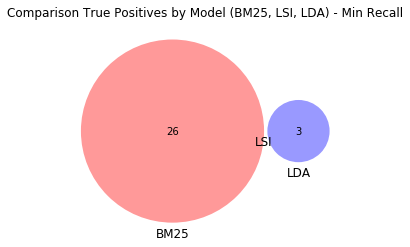

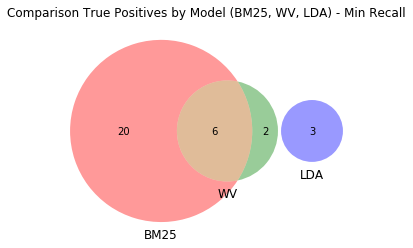

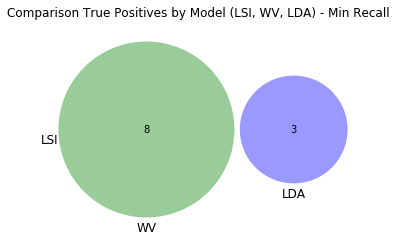

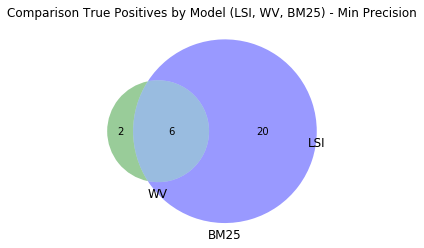

In [7]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [8]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(lsi_exc_set))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
display(lda_exc_set)
print("len(lda_exc_set): {}".format(lda_exc_set))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
display(wv_exc_set)
print("len(wv_exc_set): {}".format(wv_exc_set))

BM25 Exclusive TP:


{('TC_14_TRG', 'BR_1301421_SRC'),
 ('TC_14_TRG', 'BR_1339497_SRC'),
 ('TC_14_TRG', 'BR_1365887_SRC'),
 ('TC_159_TRG', 'BR_1432915_SRC'),
 ('TC_160_TRG', 'BR_1297686_SRC'),
 ('TC_161_TRG', 'BR_1292566_SRC'),
 ('TC_163_TRG', 'BR_1292573_SRC'),
 ('TC_164_TRG', 'BR_1287384_SRC'),
 ('TC_16_TRG', 'BR_1294887_SRC'),
 ('TC_16_TRG', 'BR_1311998_SRC'),
 ('TC_17_TRG', 'BR_1305737_SRC'),
 ('TC_17_TRG', 'BR_1408361_SRC'),
 ('TC_193_TRG', 'BR_1296322_SRC'),
 ('TC_193_TRG', 'BR_1296861_SRC'),
 ('TC_193_TRG', 'BR_1345687_SRC'),
 ('TC_19_TRG', 'BR_1291770_SRC'),
 ('TC_206_TRG', 'BR_1305195_SRC'),
 ('TC_61_TRG', 'BR_1318903_SRC'),
 ('TC_88_TRG', 'BR_1289240_SRC'),
 ('TC_88_TRG', 'BR_1299458_SRC')}

len(bm25_exc_set): 20


LSI Exclusive TP:


set()

len(lsi_exc_set): set()


LDA Exclusive TP:


{('TC_118_TRG', 'BR_1357458_SRC'),
 ('TC_157_TRG', 'BR_1292566_SRC'),
 ('TC_157_TRG', 'BR_1297686_SRC')}

len(lda_exc_set): {('TC_157_TRG', 'BR_1297686_SRC'), ('TC_118_TRG', 'BR_1357458_SRC'), ('TC_157_TRG', 'BR_1292566_SRC')}


WV Exclusive TP:


{('TC_14_TRG', 'BR_1294887_SRC'), ('TC_14_TRG', 'BR_1311998_SRC')}

len(wv_exc_set): {('TC_14_TRG', 'BR_1311998_SRC'), ('TC_14_TRG', 'BR_1294887_SRC')}


##### True Positives Amount by Model

In [9]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 0
LDA TP Amount: 3
BM25 TP Amount: 26
WV TP Amount: 8


#### Max Precision

model
bm25          28.57
lda           14.62
lsi           30.77
wordvector    15.38
Name: perc_precision, dtype: float64



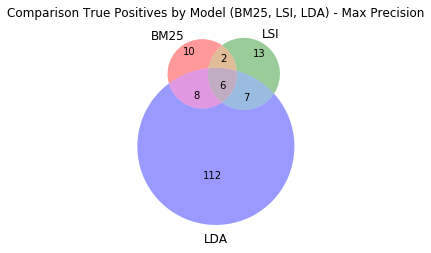

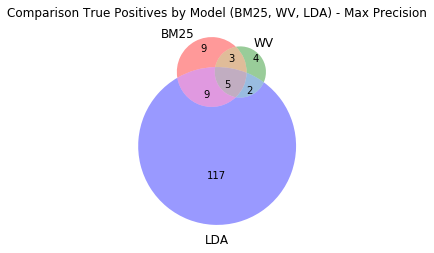

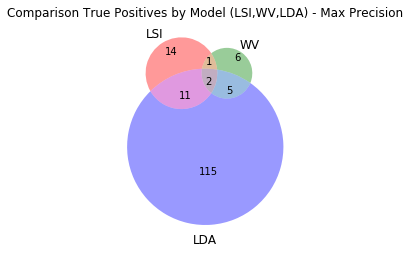

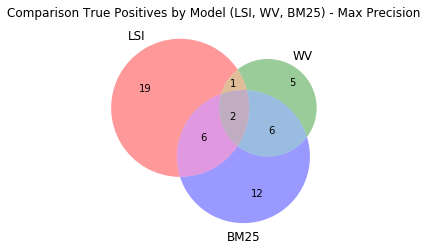

In [10]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [11]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(lsi_exc_set))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
display(lda_exc_set)
print("len(lda_exc_set): {}".format(lda_exc_set))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
display(wv_exc_set)
print("len(wv_exc_set): {}".format(wv_exc_set))

BM25 Exclusive TP:


{('TC_14_TRG', 'BR_1339497_SRC'),
 ('TC_159_TRG', 'BR_1432915_SRC'),
 ('TC_17_TRG', 'BR_1305737_SRC'),
 ('TC_193_TRG', 'BR_1296322_SRC'),
 ('TC_193_TRG', 'BR_1296861_SRC'),
 ('TC_193_TRG', 'BR_1345687_SRC'),
 ('TC_206_TRG', 'BR_1305195_SRC'),
 ('TC_61_TRG', 'BR_1318903_SRC')}

len(bm25_exc_set): 8


LSI Exclusive TP:


{('TC_13_TRG', 'BR_1339497_SRC'),
 ('TC_154_TRG', 'BR_1287384_SRC'),
 ('TC_15_TRG', 'BR_1301421_SRC'),
 ('TC_15_TRG', 'BR_1328913_SRC'),
 ('TC_161_TRG', 'BR_1432915_SRC'),
 ('TC_169_TRG', 'BR_1292573_SRC'),
 ('TC_16_TRG', 'BR_1264988_SRC'),
 ('TC_180_TRG', 'BR_1296322_SRC'),
 ('TC_180_TRG', 'BR_1345687_SRC'),
 ('TC_184_TRG', 'BR_1296861_SRC'),
 ('TC_205_TRG', 'BR_1305195_SRC'),
 ('TC_22_TRG', 'BR_1451475_SRC'),
 ('TC_60_TRG', 'BR_1318903_SRC')}

len(lsi_exc_set): {('TC_15_TRG', 'BR_1328913_SRC'), ('TC_180_TRG', 'BR_1296322_SRC'), ('TC_184_TRG', 'BR_1296861_SRC'), ('TC_205_TRG', 'BR_1305195_SRC'), ('TC_60_TRG', 'BR_1318903_SRC'), ('TC_22_TRG', 'BR_1451475_SRC'), ('TC_16_TRG', 'BR_1264988_SRC'), ('TC_169_TRG', 'BR_1292573_SRC'), ('TC_15_TRG', 'BR_1301421_SRC'), ('TC_180_TRG', 'BR_1345687_SRC'), ('TC_13_TRG', 'BR_1339497_SRC'), ('TC_161_TRG', 'BR_1432915_SRC'), ('TC_154_TRG', 'BR_1287384_SRC')}


LDA Exclusive TP:


{('TC_100_TRG', 'BR_1299458_SRC'),
 ('TC_100_TRG', 'BR_1306639_SRC'),
 ('TC_102_TRG', 'BR_1248267_SRC'),
 ('TC_102_TRG', 'BR_1270983_SRC'),
 ('TC_106_TRG', 'BR_1300738_SRC'),
 ('TC_109_TRG', 'BR_1300738_SRC'),
 ('TC_112_TRG', 'BR_1314643_SRC'),
 ('TC_113_TRG', 'BR_1314643_SRC'),
 ('TC_113_TRG', 'BR_1357458_SRC'),
 ('TC_114_TRG', 'BR_1357458_SRC'),
 ('TC_115_TRG', 'BR_1314643_SRC'),
 ('TC_115_TRG', 'BR_1357458_SRC'),
 ('TC_116_TRG', 'BR_1314643_SRC'),
 ('TC_117_TRG', 'BR_1357458_SRC'),
 ('TC_118_TRG', 'BR_1314643_SRC'),
 ('TC_118_TRG', 'BR_1357458_SRC'),
 ('TC_13_TRG', 'BR_1297374_SRC'),
 ('TC_13_TRG', 'BR_1335992_SRC'),
 ('TC_13_TRG', 'BR_1352539_SRC'),
 ('TC_143_TRG', 'BR_1305195_SRC'),
 ('TC_146_TRG', 'BR_1305195_SRC'),
 ('TC_147_TRG', 'BR_1365887_SRC'),
 ('TC_148_TRG', 'BR_1365887_SRC'),
 ('TC_14_TRG', 'BR_1264988_SRC'),
 ('TC_14_TRG', 'BR_1279864_SRC'),
 ('TC_14_TRG', 'BR_1293308_SRC'),
 ('TC_14_TRG', 'BR_1297976_SRC'),
 ('TC_14_TRG', 'BR_1408361_SRC'),
 ('TC_154_TRG', 'BR_1292566_

len(lda_exc_set): {('TC_16_TRG', 'BR_1297976_SRC'), ('TC_182_TRG', 'BR_1296322_SRC'), ('TC_24_TRG', 'BR_1301421_SRC'), ('TC_13_TRG', 'BR_1297374_SRC'), ('TC_22_TRG', 'BR_1301421_SRC'), ('TC_169_TRG', 'BR_1287384_SRC'), ('TC_113_TRG', 'BR_1357458_SRC'), ('TC_157_TRG', 'BR_1297686_SRC'), ('TC_14_TRG', 'BR_1297976_SRC'), ('TC_16_TRG', 'BR_1408361_SRC'), ('TC_87_TRG', 'BR_1270983_SRC'), ('TC_165_TRG', 'BR_1287384_SRC'), ('TC_77_TRG', 'BR_1270983_SRC'), ('TC_163_TRG', 'BR_1357458_SRC'), ('TC_143_TRG', 'BR_1305195_SRC'), ('TC_13_TRG', 'BR_1335992_SRC'), ('TC_18_TRG', 'BR_1294887_SRC'), ('TC_63_TRG', 'BR_1248268_SRC'), ('TC_18_TRG', 'BR_1311998_SRC'), ('TC_162_TRG', 'BR_1292566_SRC'), ('TC_146_TRG', 'BR_1305195_SRC'), ('TC_163_TRG', 'BR_1287384_SRC'), ('TC_63_TRG', 'BR_1336227_SRC'), ('TC_178_TRG', 'BR_1295502_SRC'), ('TC_118_TRG', 'BR_1357458_SRC'), ('TC_25_TRG', 'BR_1353831_SRC'), ('TC_162_TRG', 'BR_1297686_SRC'), ('TC_199_TRG', 'BR_1305195_SRC'), ('TC_16_TRG', 'BR_1357458_SRC'), ('TC_16_TR

{('TC_130_TRG', 'BR_1314643_SRC'),
 ('TC_14_TRG', 'BR_1311998_SRC'),
 ('TC_14_TRG', 'BR_1335992_SRC'),
 ('TC_160_TRG', 'BR_1287384_SRC')}

len(wv_exc_set): {('TC_130_TRG', 'BR_1314643_SRC'), ('TC_14_TRG', 'BR_1335992_SRC'), ('TC_14_TRG', 'BR_1311998_SRC'), ('TC_160_TRG', 'BR_1287384_SRC')}


##### True Positives Amount by Model

In [12]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 28
LDA TP Amount: 133
BM25 TP Amount: 26
WV TP Amount: 14


#### Max Recall

model
bm25          14.20
lda            8.35
lsi           14.42
wordvector     5.05
Name: perc_recall, dtype: float64



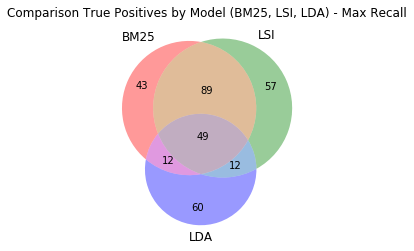

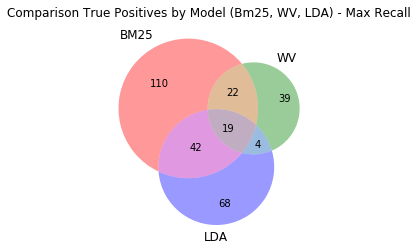

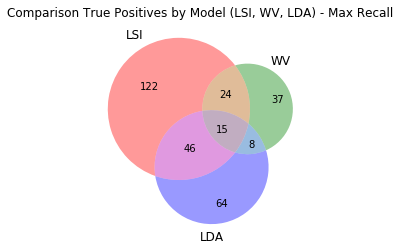

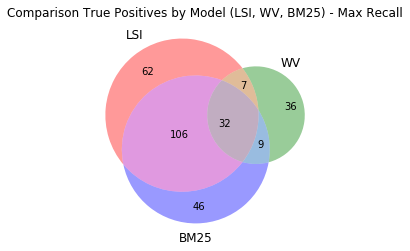

In [13]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_tp_set = aux_functions.get_true_positives( oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_tp_set, lsi_tp_set, lda_tp_set], ['BM25','LSI','LDA'])
plt.title('Comparison True Positives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_tp_set, wv_tp_set, lda_tp_set], ['BM25','WV','LDA'])
plt.title('Comparison True Positives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, lda_tp_set], ['LSI','WV','LDA'])
plt.title('Comparison True Positives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_tp_set, wv_tp_set, bm25_tp_set], ['LSI','WV','BM25'])
plt.title('Comparison True Positives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [14]:
print("BM25 Exclusive TP:")
bm25_exc_set = bm25_tp_set - lsi_tp_set - lda_tp_set - wv_tp_set
display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive TP:")
lsi_exc_set = lsi_tp_set - bm25_tp_set - lda_tp_set - wv_tp_set
display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(lsi_exc_set))

print("\n\nLDA Exclusive TP:")
lda_exc_set = lda_tp_set - lsi_tp_set - bm25_tp_set - wv_tp_set
display(lda_exc_set)
print("len(lda_exc_set): {}".format(lda_exc_set))

print("\n\nWV Exclusive TP:")
wv_exc_set = wv_tp_set - lda_tp_set - lsi_tp_set - bm25_tp_set
display(wv_exc_set)
print("len(wv_exc_set): {}".format(wv_exc_set))

BM25 Exclusive TP:


{('TC_14_TRG', 'BR_1337682_SRC'),
 ('TC_157_TRG', 'BR_1432915_SRC'),
 ('TC_161_TRG', 'BR_1292573_SRC'),
 ('TC_163_TRG', 'BR_1432915_SRC'),
 ('TC_164_TRG', 'BR_1432915_SRC'),
 ('TC_167_TRG', 'BR_1287384_SRC'),
 ('TC_167_TRG', 'BR_1292566_SRC'),
 ('TC_16_TRG', 'BR_1291770_SRC'),
 ('TC_17_TRG', 'BR_1291770_SRC'),
 ('TC_17_TRG', 'BR_1296366_SRC'),
 ('TC_17_TRG', 'BR_1297374_SRC'),
 ('TC_17_TRG', 'BR_1311998_SRC'),
 ('TC_183_TRG', 'BR_1430603_SRC'),
 ('TC_185_TRG', 'BR_1290424_SRC'),
 ('TC_186_TRG', 'BR_1290424_SRC'),
 ('TC_186_TRG', 'BR_1296322_SRC'),
 ('TC_187_TRG', 'BR_1290424_SRC'),
 ('TC_188_TRG', 'BR_1290424_SRC'),
 ('TC_189_TRG', 'BR_1345687_SRC'),
 ('TC_190_TRG', 'BR_1345687_SRC'),
 ('TC_191_TRG', 'BR_1296861_SRC'),
 ('TC_195_TRG', 'BR_1430603_SRC'),
 ('TC_203_TRG', 'BR_1365887_SRC'),
 ('TC_24_TRG', 'BR_1291770_SRC'),
 ('TC_25_TRG', 'BR_1291770_SRC'),
 ('TC_49_TRG', 'BR_1287687_SRC'),
 ('TC_59_TRG', 'BR_1336227_SRC'),
 ('TC_59_TRG', 'BR_1344446_SRC'),
 ('TC_59_TRG', 'BR_1353831_SRC'

len(bm25_exc_set): 40


LSI Exclusive TP:


{('TC_122_TRG', 'BR_1295502_SRC'),
 ('TC_13_TRG', 'BR_1264988_SRC'),
 ('TC_13_TRG', 'BR_1301421_SRC'),
 ('TC_13_TRG', 'BR_1311998_SRC'),
 ('TC_13_TRG', 'BR_1353831_SRC'),
 ('TC_13_TRG', 'BR_1357458_SRC'),
 ('TC_13_TRG', 'BR_1451475_SRC'),
 ('TC_149_TRG', 'BR_1305195_SRC'),
 ('TC_150_TRG', 'BR_1365887_SRC'),
 ('TC_151_TRG', 'BR_1365887_SRC'),
 ('TC_152_TRG', 'BR_1305195_SRC'),
 ('TC_155_TRG', 'BR_1287384_SRC'),
 ('TC_155_TRG', 'BR_1292566_SRC'),
 ('TC_155_TRG', 'BR_1292573_SRC'),
 ('TC_15_TRG', 'BR_1297976_SRC'),
 ('TC_15_TRG', 'BR_1301421_SRC'),
 ('TC_15_TRG', 'BR_1311998_SRC'),
 ('TC_15_TRG', 'BR_1328913_SRC'),
 ('TC_165_TRG', 'BR_1292573_SRC'),
 ('TC_168_TRG', 'BR_1287384_SRC'),
 ('TC_168_TRG', 'BR_1292566_SRC'),
 ('TC_168_TRG', 'BR_1292573_SRC'),
 ('TC_169_TRG', 'BR_1292573_SRC'),
 ('TC_16_TRG', 'BR_1328913_SRC'),
 ('TC_170_TRG', 'BR_1292573_SRC'),
 ('TC_178_TRG', 'BR_1316126_SRC'),
 ('TC_188_TRG', 'BR_1296322_SRC'),
 ('TC_18_TRG', 'BR_1334844_SRC'),
 ('TC_18_TRG', 'BR_1337682_SRC')

len(lsi_exc_set): {('TC_52_TRG', 'BR_1287687_SRC'), ('TC_122_TRG', 'BR_1295502_SRC'), ('TC_15_TRG', 'BR_1311998_SRC'), ('TC_18_TRG', 'BR_1339497_SRC'), ('TC_168_TRG', 'BR_1287384_SRC'), ('TC_13_TRG', 'BR_1311998_SRC'), ('TC_61_TRG', 'BR_1344446_SRC'), ('TC_170_TRG', 'BR_1292573_SRC'), ('TC_87_TRG', 'BR_1299458_SRC'), ('TC_169_TRG', 'BR_1292573_SRC'), ('TC_18_TRG', 'BR_1337682_SRC'), ('TC_165_TRG', 'BR_1292573_SRC'), ('TC_13_TRG', 'BR_1353831_SRC'), ('TC_20_TRG', 'BR_1278388_SRC'), ('TC_13_TRG', 'BR_1301421_SRC'), ('TC_168_TRG', 'BR_1292573_SRC'), ('TC_168_TRG', 'BR_1292566_SRC'), ('TC_15_TRG', 'BR_1301421_SRC'), ('TC_188_TRG', 'BR_1296322_SRC'), ('TC_16_TRG', 'BR_1328913_SRC'), ('TC_150_TRG', 'BR_1365887_SRC'), ('TC_23_TRG', 'BR_1264988_SRC'), ('TC_48_TRG', 'BR_1287687_SRC'), ('TC_71_TRG', 'BR_1301056_SRC'), ('TC_152_TRG', 'BR_1305195_SRC'), ('TC_64_TRG', 'BR_1451475_SRC'), ('TC_155_TRG', 'BR_1292566_SRC'), ('TC_18_TRG', 'BR_1334844_SRC'), ('TC_87_TRG', 'BR_1306639_SRC'), ('TC_96_TRG',

{('TC_100_TRG', 'BR_1306639_SRC'),
 ('TC_102_TRG', 'BR_1248267_SRC'),
 ('TC_102_TRG', 'BR_1270983_SRC'),
 ('TC_112_TRG', 'BR_1314643_SRC'),
 ('TC_113_TRG', 'BR_1314643_SRC'),
 ('TC_113_TRG', 'BR_1357458_SRC'),
 ('TC_114_TRG', 'BR_1357458_SRC'),
 ('TC_115_TRG', 'BR_1314643_SRC'),
 ('TC_115_TRG', 'BR_1357458_SRC'),
 ('TC_116_TRG', 'BR_1314643_SRC'),
 ('TC_117_TRG', 'BR_1357458_SRC'),
 ('TC_118_TRG', 'BR_1314643_SRC'),
 ('TC_118_TRG', 'BR_1357458_SRC'),
 ('TC_143_TRG', 'BR_1305195_SRC'),
 ('TC_146_TRG', 'BR_1305195_SRC'),
 ('TC_154_TRG', 'BR_1297686_SRC'),
 ('TC_157_TRG', 'BR_1297686_SRC'),
 ('TC_160_TRG', 'BR_1292573_SRC'),
 ('TC_162_TRG', 'BR_1297686_SRC'),
 ('TC_163_TRG', 'BR_1314643_SRC'),
 ('TC_164_TRG', 'BR_1297686_SRC'),
 ('TC_165_TRG', 'BR_1297686_SRC'),
 ('TC_166_TRG', 'BR_1297686_SRC'),
 ('TC_169_TRG', 'BR_1297686_SRC'),
 ('TC_174_TRG', 'BR_1316126_SRC'),
 ('TC_177_TRG', 'BR_1295502_SRC'),
 ('TC_178_TRG', 'BR_1295502_SRC'),
 ('TC_182_TRG', 'BR_1296322_SRC'),
 ('TC_18_TRG', 'BR_1

len(lda_exc_set): {('TC_117_TRG', 'BR_1357458_SRC'), ('TC_182_TRG', 'BR_1296322_SRC'), ('TC_100_TRG', 'BR_1306639_SRC'), ('TC_24_TRG', 'BR_1301421_SRC'), ('TC_20_TRG', 'BR_1297336_SRC'), ('TC_24_TRG', 'BR_1294887_SRC'), ('TC_22_TRG', 'BR_1301421_SRC'), ('TC_113_TRG', 'BR_1357458_SRC'), ('TC_118_TRG', 'BR_1314643_SRC'), ('TC_157_TRG', 'BR_1297686_SRC'), ('TC_18_TRG', 'BR_1297976_SRC'), ('TC_87_TRG', 'BR_1270983_SRC'), ('TC_165_TRG', 'BR_1297686_SRC'), ('TC_25_TRG', 'BR_1294887_SRC'), ('TC_77_TRG', 'BR_1270983_SRC'), ('TC_115_TRG', 'BR_1357458_SRC'), ('TC_143_TRG', 'BR_1305195_SRC'), ('TC_25_TRG', 'BR_1335992_SRC'), ('TC_194_TRG', 'BR_1296322_SRC'), ('TC_146_TRG', 'BR_1305195_SRC'), ('TC_114_TRG', 'BR_1357458_SRC'), ('TC_63_TRG', 'BR_1336227_SRC'), ('TC_113_TRG', 'BR_1314643_SRC'), ('TC_25_TRG', 'BR_1408361_SRC'), ('TC_178_TRG', 'BR_1295502_SRC'), ('TC_118_TRG', 'BR_1357458_SRC'), ('TC_102_TRG', 'BR_1248267_SRC'), ('TC_25_TRG', 'BR_1353831_SRC'), ('TC_162_TRG', 'BR_1297686_SRC'), ('TC_19

{('TC_131_TRG', 'BR_1314643_SRC'),
 ('TC_135_TRG', 'BR_1314643_SRC'),
 ('TC_13_TRG', 'BR_1305737_SRC'),
 ('TC_13_TRG', 'BR_1309856_SRC'),
 ('TC_13_TRG', 'BR_1408361_SRC'),
 ('TC_14_TRG', 'BR_1278388_SRC'),
 ('TC_14_TRG', 'BR_1291770_SRC'),
 ('TC_14_TRG', 'BR_1309856_SRC'),
 ('TC_14_TRG', 'BR_1319119_SRC'),
 ('TC_14_TRG', 'BR_1451475_SRC'),
 ('TC_159_TRG', 'BR_1287384_SRC'),
 ('TC_160_TRG', 'BR_1287384_SRC'),
 ('TC_161_TRG', 'BR_1287384_SRC'),
 ('TC_180_TRG', 'BR_1290424_SRC'),
 ('TC_181_TRG', 'BR_1290424_SRC'),
 ('TC_193_TRG', 'BR_1290424_SRC'),
 ('TC_193_TRG', 'BR_1357458_SRC'),
 ('TC_65_TRG', 'BR_1301056_SRC'),
 ('TC_77_TRG', 'BR_1306639_SRC'),
 ('TC_79_TRG', 'BR_1306639_SRC'),
 ('TC_79_TRG', 'BR_1365887_SRC'),
 ('TC_80_TRG', 'BR_1248267_SRC'),
 ('TC_80_TRG', 'BR_1306639_SRC'),
 ('TC_81_TRG', 'BR_1248267_SRC'),
 ('TC_81_TRG', 'BR_1270983_SRC'),
 ('TC_81_TRG', 'BR_1299458_SRC'),
 ('TC_82_TRG', 'BR_1248267_SRC'),
 ('TC_83_TRG', 'BR_1248267_SRC'),
 ('TC_91_TRG', 'BR_1270983_SRC'),
 ('TC

len(wv_exc_set): {('TC_135_TRG', 'BR_1314643_SRC'), ('TC_14_TRG', 'BR_1451475_SRC'), ('TC_181_TRG', 'BR_1290424_SRC'), ('TC_79_TRG', 'BR_1365887_SRC'), ('TC_180_TRG', 'BR_1290424_SRC'), ('TC_94_TRG', 'BR_1299458_SRC'), ('TC_81_TRG', 'BR_1299458_SRC'), ('TC_161_TRG', 'BR_1287384_SRC'), ('TC_13_TRG', 'BR_1305737_SRC'), ('TC_159_TRG', 'BR_1287384_SRC'), ('TC_160_TRG', 'BR_1287384_SRC'), ('TC_13_TRG', 'BR_1309856_SRC'), ('TC_13_TRG', 'BR_1408361_SRC'), ('TC_79_TRG', 'BR_1306639_SRC'), ('TC_94_TRG', 'BR_1270983_SRC'), ('TC_77_TRG', 'BR_1306639_SRC'), ('TC_14_TRG', 'BR_1291770_SRC'), ('TC_14_TRG', 'BR_1309856_SRC'), ('TC_83_TRG', 'BR_1248267_SRC'), ('TC_80_TRG', 'BR_1248267_SRC'), ('TC_82_TRG', 'BR_1248267_SRC'), ('TC_131_TRG', 'BR_1314643_SRC'), ('TC_94_TRG', 'BR_1306639_SRC'), ('TC_92_TRG', 'BR_1299458_SRC'), ('TC_65_TRG', 'BR_1301056_SRC'), ('TC_81_TRG', 'BR_1248267_SRC'), ('TC_193_TRG', 'BR_1357458_SRC'), ('TC_91_TRG', 'BR_1270983_SRC'), ('TC_14_TRG', 'BR_1319119_SRC'), ('TC_80_TRG', 'BR

##### True Positives Amount by Model

In [15]:
print("LSI TP Amount: {}".format(len(lsi_tp_set)))
print("LDA TP Amount: {}".format(len(lda_tp_set)))
print("BM25 TP Amount: {}".format(len(bm25_tp_set)))
print("WV TP Amount: {}".format(len(wv_tp_set)))

LSI TP Amount: 207
LDA TP Amount: 133
BM25 TP Amount: 193
WV TP Amount: 84
